In [5]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 괄호 변환

- 프로그래머스 **재귀** 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/60058

# 문제 설명

* **균형잡힌 괄호 문자열**이란? '(' 여는 괄호와 ')' 닫는 괄호의 개수가 같은 것 ex ) ( ) (

* **올바른 괄호 문자열**이란? 균형잡힌 괄호 문자열 중 열고 닫음이 올바른 경우 ex ( ( ) )

예시를 살펴보면, w는 위의 입력이고 f는 해당 과정을 수행하는 함수라고 할 때, w를 f의 입력으로 넣으면

Step1. 먼저 빈 문자열이 아니므로 2번으로 넘어가고, w를 두 균형잡힌 문자열로 분리하되, u는 최소의 균형잡힌 문자열로 분리합니다. 그리고 u가 올바른 괄호 문자열이므로 3번에 따라 v를 입력값으로 하는 함수를 다시 실행합니다.

Step2. 다시 분리된 두 균형잡힌 문자열을 u', v'로 생각하고, u'가 이번에는 올바른 괄호 문자열이 아니므로 4번에 따라 수행합니다. 이때 4-2에 따라 v'에 재귀적으로 다시 입력값으로 넣고 f를 수행합니다.

Step3. 다시 분리된 두 균형잡힌 문자열을 u'', v''로 생각하고, u''가 올바른 괄호 문자열이며, v''가 공백이므로 드디어 결과를 출력하고 f(v') 함수가 종료되며, 이 결과를 받아 f(v) 함수가 종료되고, 또 결과를 받아 f(w) 의 최종적인 결과를 출력할 수 있습니다.

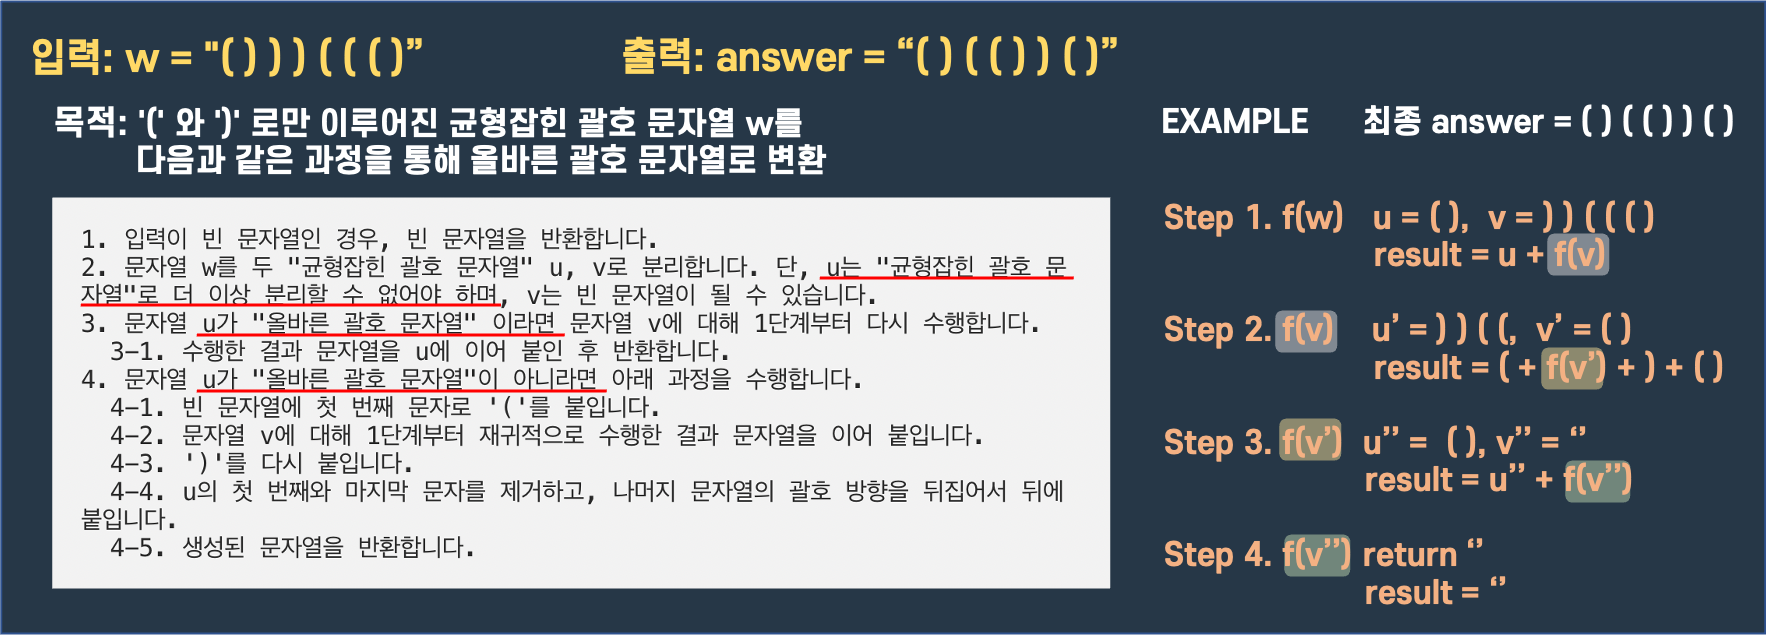

In [6]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/4-summary.png", height=350)

### 함수 정의
* **process(w) -> <str> result**:    f, 과정을 수행, 최종적으로는 올바른 괄호 문자열로 변환된 결과를 반환
* **seperate_balance_str(w) -> <str> u, v**:    w를 u, v로 나누는 함수, 특히 u가 최소의 균형잡힌 괄호 문자열이 되도록하고 u, v를 반환
* **isCorrect(w) -> <boolean> T, F**:    올바른 괄호 문자열인지 확인하는 함수, 참 또는 거짓을 반환



<br>
<br>
<br>





# 풀이

In [ ]:
from collections import deque

# 입력이 올바른 괄호 문자열인지 확인
#   스택을 이용하여 여는 괄호가 나오면 스택에 넣고, 
#               닫는 괄호가 나오면 stack의 가장 위에 있는 괄호가 여는 괄호일 때 여는 괄호를 스택에서 빼고, 그렇지 않으면 이 닫는 괄호를 스택에 넣기
#   마지막에 스택이 비어있다면 올바른 괄호 문자열이므로 True를 반환, 아닐 경우 False를 반환
def isCorrect(w):
    stack = deque([])
    for s in w:
        if s == '(': # 여는 괄호
            stack.append(s)
        else: # 닫는 괄호
            if stack and stack[-1] == '(':
                stack.pop()
            else:
                stack.append(s)
    
    if stack: # 스택에 남아 있음
        return False
    else:
        return True


# 2. u, v로 나누기 (u는 더 이상 분리할 수 없는 균형잡힌 괄호 문자열)
#    딕셔너리를 이용하여 앞에서부터 괄호 개수를 업데이트, 여는 괄호와 닫는 괄호가 처음으로 같아질 때 거기까지 u, 나머지는 v
def seperate_balance_str(w):
    u = ''; v = '' # 초기화
    count = {'(':0, ')':0}

    for i in range(len(w)):
        u = u + w[i]
        count[w[i]] += 1
        if count['('] == count[')']: # count['u'] != 0
            v = w[i+1:]
            break

    return u, v


# 1, 3, 4
def process(w):
    result = ""

    # 1. 입력 문자열이 공백일 때 그대로 반환
    if w == "": 
        return result

    # 3. 4.
    else:
        u, v = seperate_balance_str(w)

        # 3. u가 올바른 괄호 문자열일 경우
        if isCorrect(u):
            result = u + process(v)

        # 4. u가 올바른 괄호 문자열이 아닌 경우
        else:
            result = '(' + process(v) + ')'  
            for s in u[1:-1]: # 괄호 방향 반대로 붙이기
                if s == '(':
                    result += ')'
                else:
                    result += '('           
        return result

def solution(w):
    answer = process(w)
    return answer

* Test

In [ ]:
w = "(()())()"
print(solution(w)) # 정답: (()())()

(()())()


In [ ]:
w = ")("
print(solution(w)) # 정답: ()

()


In [ ]:
w = "()))((()"
print(solution(w)) # 정답: ()(())()

()(())()


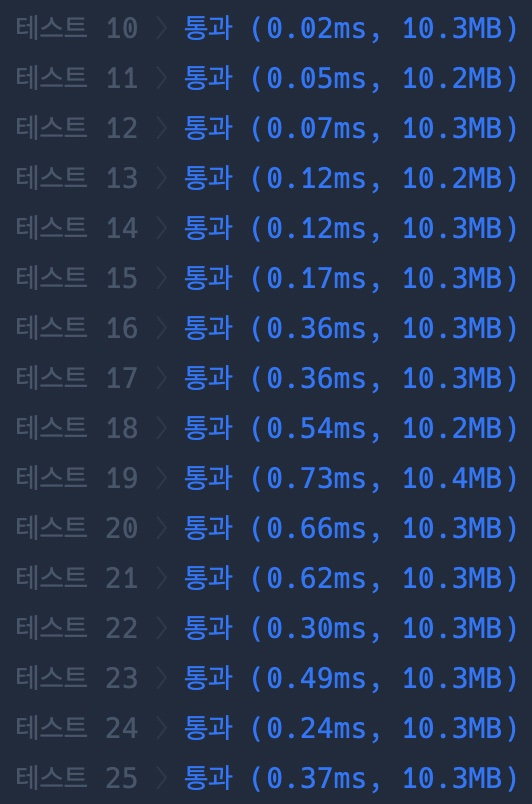

In [ ]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/4-success1.jpg", height=300)

<br>
<br>
<br>



## 다른 풀이


함수를 따로 만들지 않음, 올바른 괄호 문자열 체크에서 스택을 사용하지 않고 

여는 괄호면 -1, 닫는 괄호면 +1을 해서 0이되면 **균형잡힌 문자열**로 판단하고, 

0보다 큰 적이 있었다면 닫는 괄호가 먼저 들어간 것이므로 **올바르지 않은 문자열**로 판단

In [ ]:
def solution(p):
    if p=='': return p
    r=True; c=0
    for i in range(len(p)):
        if p[i]=='(': c-=1
        else: c+=1
        if c>0: r=False
        if c==0:
            if r: # u가 올바른 괄호 문자열
                return p[:i+1]+solution(p[i+1:])
            else: # u가 올바르지 않은 괄호 문자열
                return '('+solution(p[i+1:])+')'+''.join(list(map(lambda x:'(' if x==')' else ')',p[1:i]) ))

In [ ]:
w = "(()())()"
print(solution(w)) # 정답: (()())()

(()())()


In [ ]:
w = ")("
print(solution(w)) # 정답: ()

()


In [ ]:
w = "()))((()"
print(solution(w)) # 정답: ()(())()

()(())()


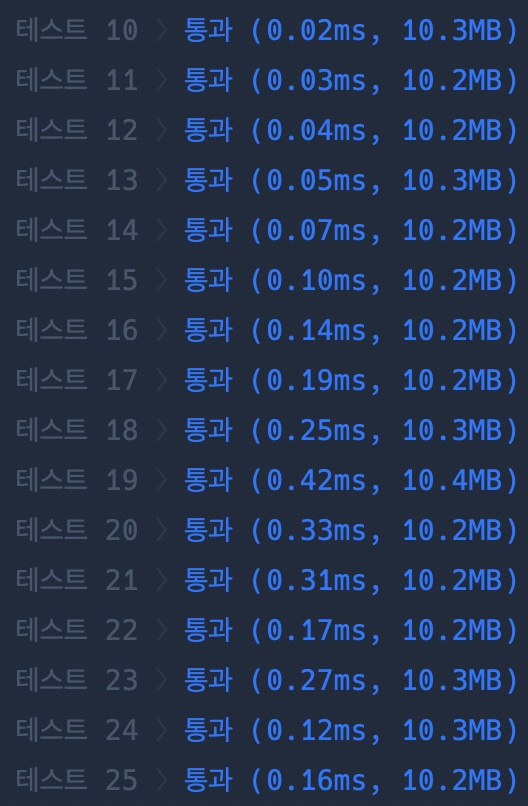

In [ ]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/4-success2.jpg", height=300)
# 거의 1/2로 단축